In [1]:
import sys
sys.path.append('../../')
from helpers.window import window_input_output

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.multioutput import MultiOutputRegressor

In [3]:
df = pd.read_csv('../../datasets/Organic.csv')
df.head()

,Date,Envi,Fuji,Gala
0,2015-01-04,3199,6917,8
1,2015-01-11,8856,15071,25
2,2015-01-18,5475,32539,42
3,2015-01-25,4271,8412,585
4,2015-02-01,4824,10710,104


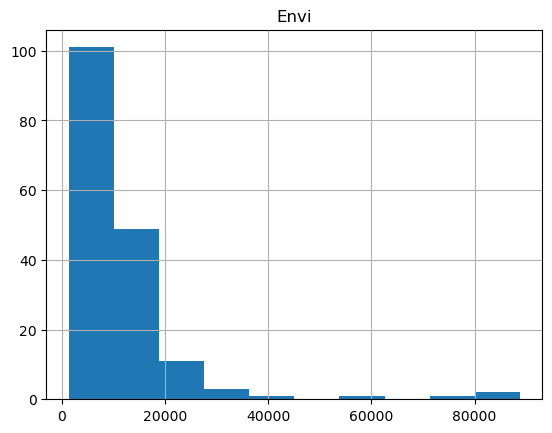

In [4]:
data = df[['Envi']]
data.hist();

In [5]:
seq_df = window_input_output(14, 14, data)
seq_df

,Envi,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,y_4,y_5,y_6,y_7,y_8,y_9,y_10,y_11,y_12,y_13
27,9772,9787.0,10715.0,9953.0,11489.0,11956.0,11232.0,13289.0,19912.0,19400.0,...,34792.0,15769.0,4987.0,2347.0,3018.0,4824.0,4271.0,5475.0,8856.0,3199.0
28,9847,9772.0,9787.0,10715.0,9953.0,11489.0,11956.0,11232.0,13289.0,19912.0,...,27916.0,34792.0,15769.0,4987.0,2347.0,3018.0,4824.0,4271.0,5475.0,8856.0
29,9086,9847.0,9772.0,9787.0,10715.0,9953.0,11489.0,11956.0,11232.0,13289.0,...,9366.0,27916.0,34792.0,15769.0,4987.0,2347.0,3018.0,4824.0,4271.0,5475.0
30,10555,9086.0,9847.0,9772.0,9787.0,10715.0,9953.0,11489.0,11956.0,11232.0,...,5456.0,9366.0,27916.0,34792.0,15769.0,4987.0,2347.0,3018.0,4824.0,4271.0
31,12491,10555.0,9086.0,9847.0,9772.0,9787.0,10715.0,9953.0,11489.0,11956.0,...,8697.0,5456.0,9366.0,27916.0,34792.0,15769.0,4987.0,2347.0,3018.0,4824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,8387,8065.0,5261.0,3747.0,6132.0,7842.0,8396.0,8897.0,4401.0,6227.0,...,5719.0,11990.0,7350.0,3685.0,3287.0,6552.0,6045.0,5320.0,5403.0,5178.0
165,5777,8387.0,8065.0,5261.0,3747.0,6132.0,7842.0,8396.0,8897.0,4401.0,...,4980.0,5719.0,11990.0,7350.0,3685.0,3287.0,6552.0,6045.0,5320.0,5403.0
166,7033,5777.0,8387.0,8065.0,5261.0,3747.0,6132.0,7842.0,8396.0,8897.0,...,4139.0,4980.0,5719.0,11990.0,7350.0,3685.0,3287.0,6552.0,6045.0,5320.0
167,10539,7033.0,5777.0,8387.0,8065.0,5261.0,3747.0,6132.0,7842.0,8396.0,...,4294.0,4139.0,4980.0,5719.0,11990.0,7350.0,3685.0,3287.0,6552.0,6045.0


## Split data

In [6]:
X_cols = [col for col in seq_df.columns if col.startswith('x')]
X_cols.insert(0, 'Envi')
y_cols = [col for col in seq_df.columns if col.startswith('y')]

X = seq_df[X_cols]
y = seq_df[y_cols]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=123)

In [7]:
model = MultiOutputRegressor(OneVsRestClassifier(SVR(kernel='rbf')))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

## Score

In [8]:
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error (Envi):", mse)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (Envi):", mae)

print("R-squared (Test score)", model.score(X_test, y_test))
print("Train score", model.score(X_train, y_train))

Mean Squared Error (Envi): 108864617.44088669
Mean Absolute Error (Envi): 7026.938423645321
R-squared (Test score) -1.4090082887592421
Train score 1.0


## Visualization

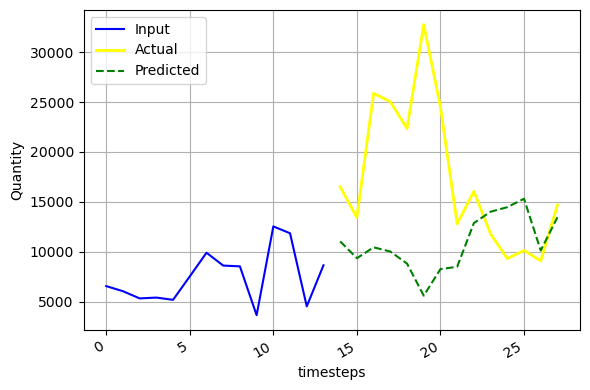

In [9]:
X_test_array = X_test.to_numpy()
y_test_array = y_test.to_numpy()

fig, ax = plt.subplots(figsize=(6, 4))

ax.plot(np.arange(0, 14, 1), X_test_array[1], 'b-', label='Input')
ax.plot(np.arange(14, 28, 1), y_test_array[1], color='yellow', label='Actual', linewidth=2)
ax.plot(np.arange(14, 28, 1), y_pred[1], color='green', label='Predicted', linestyle='--')

ax.set_xlabel('timesteps')
ax.set_ylabel('Quantity')
plt.grid(True)
plt.legend(loc=2)
fig.autofmt_xdate()
plt.tight_layout()
plt.show()